## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')

C:\Users\sathi\AppData\Local\Temp\ipykernel_7704\163669101.py:1: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')


In [51]:
df.proto.unique()

array(['tcp', 'udp', 'icmp', 'arp', 'ospf', 'udt', 'sctp', 'igmp', 'gre',
       'sep', 'swipe', 'mobile', 'sun-nd', 'pim', 'rtp', 'ip', 'ggp',
       'ipnip', 'st2', 'cbt', 'argus', 'bbn-rcc', 'chaos', 'egp', 'emcon',
       'igp', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1',
       'trunk-2', 'xns-idp', 'irtp', 'leaf-1', 'leaf-2', 'rdp', 'iso-tp4',
       'netblt', 'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp',
       'idpr-cmtp', 'tp++', 'il', 'ipv6', 'ipv6-route', 'sdrp',
       'ipv6-frag', 'idrp', 'rsvp', 'bna', 'mhrp', 'i-nlsp', 'narp',
       'tlsp', 'skip', 'ipv6-no', 'ipv6-opts', 'any', 'cftp', 'sat-expak',
       'kryptolan', 'ippc', 'rvd', 'sat-mon', 'cpnx', 'ipcv', 'visa',
       'cphb', 'wsn', 'br-sat-mon', 'pvp', 'wb-mon', 'iso-ip', 'wb-expak',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'larp', 'sprite-rpc', 'ax.25', 'ipip', 'mtp',
       'aes-sp3-d', 'etherip', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp

In [3]:
df1 = df.drop_duplicates()

In [5]:
print("records in df: ",len(df))
print("records in df1: ",len(df1))

records in df:  2540047
records in df1:  2059416


In [5]:
len(df)-len(df1)

480631

## Import Train and test datasets

In [2]:
train = pd.read_csv(r'D:\Project Phase II\Dataset\train.csv',encoding='cp1252')
test = pd.read_csv(r'D:\Project Phase II\Dataset\test.csv',encoding='cp1252')

## Train-Test Sample Dataset loading

In [3]:
featureset = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat']


todrop = ['srcip','dstip','Stime', 'Ltime','attack_cat']

In [4]:
todrop = ['srcip','dstip','sport','dsport','Stime', 'Ltime','attack_cat']
train = train.drop(todrop, axis = 1)
test = test.drop(todrop, axis = 1)

## Give proper label value for categorical attributes - state, proto, service

In [29]:
authortest = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_testing-set.csv',encoding='cp1252')
authortrain = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_training-set.csv',encoding='cp1252')

In [14]:
len(df1.proto.unique())

135

In [15]:
df1.proto.unique()

array(['tcp', 'udp', 'icmp', 'arp', 'ospf', 'udt', 'sctp', 'igmp', 'gre',
       'sep', 'swipe', 'mobile', 'sun-nd', 'pim', 'rtp', 'ip', 'ggp',
       'ipnip', 'st2', 'cbt', 'argus', 'bbn-rcc', 'chaos', 'egp', 'emcon',
       'igp', 'nvp', 'pup', 'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1',
       'trunk-2', 'xns-idp', 'irtp', 'leaf-1', 'leaf-2', 'rdp', 'iso-tp4',
       'netblt', 'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp',
       'idpr-cmtp', 'tp++', 'il', 'ipv6', 'ipv6-route', 'sdrp',
       'ipv6-frag', 'idrp', 'rsvp', 'bna', 'mhrp', 'i-nlsp', 'narp',
       'tlsp', 'skip', 'ipv6-no', 'ipv6-opts', 'any', 'cftp', 'sat-expak',
       'kryptolan', 'ippc', 'rvd', 'sat-mon', 'cpnx', 'ipcv', 'visa',
       'cphb', 'wsn', 'br-sat-mon', 'pvp', 'wb-mon', 'iso-ip', 'wb-expak',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'larp', 'sprite-rpc', 'ax.25', 'ipip', 'mtp',
       'aes-sp3-d', 'etherip', 'micp', 'encap', 'pri-enc', 'gmtp', 'ifmp

In [16]:
df1.proto.value_counts()

proto
tcp     1448859
udp      588027
arp        6658
unas       4765
ospf       3964
         ...   
ddp          46
xtp          46
udt           8
rtp           7
esp           2
Name: count, Length: 135, dtype: int64

In [28]:
pd.set_option('display.max_rows', None)  # Show all rows
grouped_counts = df1.groupby(['proto', 'Label']).size().unstack(fill_value=0)
grouped_counts

Label,0,1
proto,,
3pc,0,46
a/n,0,46
aes-sp3-d,0,46
any,0,138
argus,0,46
aris,0,46
arp,6658,0
ax.25,0,46
bbn-rcc,0,46


In [31]:
pd.set_option('display.max_rows', None)  # Show all rows
grouped_counts = authortrain.groupby(['proto', 'label']).size().unstack(fill_value=0)
grouped_counts

label,0,1
proto,,
3pc,0,100
a/n,0,100
aes-sp3-d,0,100
any,0,300
argus,0,98
aris,0,100
arp,2859,0
ax.25,0,100
bbn-rcc,0,98


In [32]:
pd.set_option('display.max_rows', None)  # Show all rows
grouped_counts = authortest.groupby(['proto', 'label']).size().unstack(fill_value=0)
grouped_counts

label,0,1
proto,,
3pc,0,32
a/n,0,32
aes-sp3-d,0,32
any,0,96
argus,0,33
aris,0,32
arp,987,0
ax.25,0,32
bbn-rcc,0,34


In [17]:
df1.service.unique()

array(['-', 'ftp-data', 'dns', 'smtp', 'http', 'ftp', 'ssh', 'pop3',
       'dhcp', 'snmp', 'ssl', 'irc', 'radius'], dtype=object)

In [18]:
len(df1.service.unique())

13

In [23]:
grouped_counts = df1.groupby(['service', 'Label']).size().unstack(fill_value=0)
grouped_counts

Label,0,1
service,,
-,1118078,51100
dhcp,0,102
dns,366295,20461
ftp,43047,2027
ftp-data,123891,958
http,185226,18305
irc,1,30
pop3,4,1486
radius,10,27


In [33]:
grouped_counts = authortrain.groupby(['service', 'label']).size().unstack(fill_value=0)
grouped_counts

label,0,1
service,,
-,36512,57656
dhcp,0,94
dns,7493,39801
ftp,1218,2210
ftp-data,2552,1443
http,5348,13376
irc,0,25
pop3,4,1101
radius,2,10


In [34]:
grouped_counts = authortest.groupby(['service', 'label']).size().unstack(fill_value=0)
grouped_counts

label,0,1
service,,
-,27375,19778
dhcp,0,26
dns,3068,18299
ftp,758,794
ftp-data,949,447
http,4013,4274
irc,0,5
pop3,0,423
radius,2,7


In [19]:
df1.state.unique()

array(['FIN', 'INT', 'CON', 'ECO', 'REQ', 'PAR', 'ACC', 'RST', 'TST',
       'ECR', 'TXD', 'no', 'URN', 'MAS', 'CLO', 'URH'], dtype=object)

In [20]:
len(df1.state.unique())

16

In [25]:
grouped_counts = df1.groupby(['state', 'Label']).size().unstack(fill_value=0)
grouped_counts

Label,0,1
state,,
ACC,39,2
CLO,159,1
CON,542403,894
ECO,313,0
ECR,8,0
FIN,1379543,53965
INT,30945,44392
MAS,8,0
PAR,30,0


In [35]:
grouped_counts = authortrain.groupby(['state', 'label']).size().unstack(fill_value=0)
grouped_counts

label,0,1
state,,
CON,12099,1053
ECO,12,0
FIN,37175,40650
INT,5715,76560
PAR,1,0
REQ,925,1066
RST,71,12
URN,1,0
no,1,0


In [36]:
grouped_counts = authortest.groupby(['state', 'label']).size().unstack(fill_value=0)
grouped_counts

label,0,1
state,,
ACC,2,2
CLO,0,1
CON,6633,349
FIN,24172,15167
INT,4485,29678
REQ,1707,135
RST,1,0


## Feature stats

In [6]:
#Find correlation values with Label
correlation = train.corrwith(train['Label'])

#Sort the correlation values based on abs
correlation1 = correlation.abs().sort_values(ascending = False)
print(correlation1)


Label               1.000000
dttl                0.881692
ct_state_ttl        0.852486
sttl                0.756231
tcprtt              0.688349
ackdat              0.677410
synack              0.628098
Dload               0.460126
ct_srv_dst          0.353331
ct_dst_ltm          0.322629
ct_srv_src          0.305204
dmeansz             0.300726
state               0.289415
ct_src_ ltm         0.204310
smeansz             0.167465
service             0.148940
ct_flw_http_mthd    0.136627
dur                 0.119315
Sload               0.117225
dwin                0.109501
swin                0.108632
Sjit                0.095562
Dpkts               0.094790
trans_depth         0.088240
dloss               0.079303
dbytes              0.064636
proto               0.060165
stcpb               0.058423
dtcpb               0.054865
sbytes              0.047334
sloss               0.034052
Spkts               0.024816
ct_dst_sport_ltm    0.024080
Dintpkt             0.022289
is_ftp_login  

In [7]:
print(correlation)

proto              -0.060165
state               0.289415
dur                 0.119315
sbytes              0.047334
dbytes             -0.064636
sttl                0.756231
dttl                0.881692
sloss               0.034052
dloss              -0.079303
service             0.148940
Sload               0.117225
Dload              -0.460126
Spkts              -0.024816
Dpkts              -0.094790
swin                0.108632
dwin                0.109501
stcpb               0.058423
dtcpb               0.054865
smeansz             0.167465
dmeansz            -0.300726
trans_depth         0.088240
res_bdy_len        -0.012914
Sjit                0.095562
Djit               -0.008843
Sintpkt             0.019186
Dintpkt             0.022289
tcprtt              0.688349
synack              0.628098
ackdat              0.677410
ct_state_ttl        0.852486
ct_flw_http_mthd    0.136627
is_ftp_login       -0.019471
ct_ftp_cmd          0.017191
ct_srv_src         -0.305204
ct_srv_dst    

L1 regularisation

In [30]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [31]:
X_train = train.drop('Label', axis = 1)
y_train = train['Label']
X_test = test.drop('Label', axis = 1)
y_test = test['Label']
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

In [23]:
autrain = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_training-set.csv',encoding='cp1252')
autest = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_testing-set.csv',encoding='cp1252')

In [24]:
todrop = ['attack_cat','rate','ï»¿id']
autrain = autrain.drop(todrop, axis = 1)
autest = autest.drop(todrop, axis = 1)

In [25]:
autrain = autrain.drop_duplicates()
autest = autest.drop_duplicates()

In [26]:
#label encode nominal attributes
le = LabelEncoder()
autrain['proto'] = le.fit_transform(autrain['proto'])
autrain['state'] = le.fit_transform(autrain['state'])
autrain['service'] = le.fit_transform(autrain['service'])
autest['proto'] = le.fit_transform(autest['proto'])
autest['state'] = le.fit_transform(autest['state'])
autest['service'] = le.fit_transform(autest['service'])

In [27]:
auX_train = autrain.drop(['label'], axis = 1)
auy_train = autrain['label']
auX_test = autest.drop(['label'], axis = 1)
auy_test = autest['label']
auX_train_scaled = StandardScaler().fit_transform(auX_train)
auX_test_scaled = StandardScaler().fit_transform(auX_test)

In [28]:
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
clf.fit(auX_train_scaled, auy_train)

# Evaluate the model
train_accuracy = clf.score(auX_train_scaled, auy_train)
test_accuracy = clf.score(auX_test_scaled, auy_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the selected features and their corresponding coefficients
selected_features = [feature for feature, coef in zip(auX_train.columns, clf.coef_[0]) if coef != 0]
print("Selected Features:", selected_features)

Training Accuracy: 0.8954467803572663
Testing Accuracy: 0.7881264827995255
Selected Features: ['dur', 'proto', 'service', 'state', 'dpkts', 'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'synack', 'ackdat', 'smean', 'dmean', 'response_body_len', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


In [29]:
for feature, coef in zip(auX_train.columns, clf.coef_[0]):
    print(feature, ':', coef)

dur : 0.01926850423683426
proto : -0.08280755567019127
service : 1.0157648036613767
state : 1.145818194195206
spkts : 0.0
dpkts : 1.193153118954516
sbytes : 0.0
dbytes : -1.2018423506508706
sttl : 1.046215440836049
dttl : 6.39694128801298
sload : 0.02869878585919368
dload : -9.923314240960119
sloss : 0.7557011757745776
dloss : 0.0
sinpkt : -0.5119105684602044
dinpkt : -0.010542144488970123
sjit : -0.016719578017830063
djit : 0.12052571259669125
swin : -5.081923837055613
stcpb : -0.008293660368461128
dtcpb : 0.01005951746912842
dwin : -0.32205675631128255
tcprtt : 0.0
synack : -0.48104000330426416
ackdat : 0.03559645060445992
smean : -0.06563901830586882
dmean : 2.347245904027503
trans_depth : 0.0
response_body_len : -0.025130166711715696
ct_srv_src : 0.0
ct_state_ttl : 0.5689421489623573
ct_dst_ltm : 0.21515343663092687
ct_src_dport_ltm : 0.37911505123015954
ct_dst_sport_ltm : 1.0316125779721728
ct_dst_src_ltm : 0.010072610884166017
is_ftp_login : 0.0024630074952471004
ct_ftp_cmd : 0.1

In [32]:
clf = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
clf.fit(X_train_scaled, y_train)

# Evaluate the model
train_accuracy = clf.score(X_train_scaled, y_train)
test_accuracy = clf.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print the selected features and their corresponding coefficients
selected_features = [feature for feature, coef in zip(X_train.columns, clf.coef_[0]) if coef != 0]
print("Selected Features:", selected_features)

Training Accuracy: 0.9912808323834008
Testing Accuracy: 0.9920208250806406
Selected Features: ['proto', 'state', 'dur', 'dbytes', 'sttl', 'dttl', 'sloss', 'service', 'Sload', 'Dload', 'swin', 'smeansz', 'dmeansz', 'res_bdy_len', 'Djit', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm']


In [33]:
for feature, coef in zip(X_train.columns, clf.coef_[0]):
    print(feature, ':', coef)

proto : 0.027118845401539526
state : 1.0787980482685664
dur : 0.06174376946237158
sbytes : 0.0
dbytes : -0.13873522702437935
sttl : 1.3958978470620707
dttl : 7.1448600634351145
sloss : 1.0224208539209814
dloss : 0.0
service : 1.0560669419213016
Sload : 0.0665127492444044
Dload : -0.28478010473531085
Spkts : 0.0
Dpkts : 0.0
swin : -4.216764976579813
dwin : 0.0
stcpb : 0.0
dtcpb : 0.0
smeansz : 0.10082109180214749
dmeansz : 2.138011415854109
trans_depth : 0.0
res_bdy_len : -0.048263072038305585
Sjit : 0.0
Djit : 0.047991532413223674
Sintpkt : -0.2918382459647479
Dintpkt : 0.1847322945678647
tcprtt : -0.032018788625223435
synack : -0.39081650992458905
ackdat : -0.09717395380692999
ct_state_ttl : 0.9277955151824566
ct_flw_http_mthd : -0.02743111471249344
is_ftp_login : 0.15161852075312185
ct_ftp_cmd : 0.02443013990058301
ct_srv_src : -0.10371330260929068
ct_srv_dst : -0.3505086591090816
ct_dst_ltm : -0.03904216783753065
ct_src_ ltm : 0.006592897280172758
ct_src_dport_ltm : 0.24971848316493

Chi_Squared scores

In [35]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(score_func=chi2)
chi2_selector.fit(X_train, y_train)

# Get the chi-squared scores for each feature
chi2_scores = chi2_selector.scores_

# Print the chi-squared scores for each feature
for feature, score in zip(X_train.columns, chi2_scores):
    print(f"{feature}: {score}")

proto: 110.23698870645991
state: 1192.4967290630912
dur: 19804.124629412545
sbytes: 723638908.2763088
dbytes: 451220605.09511805
sttl: 4423583.100675568
dttl: 6154564.469131945
sloss: 89437.83024525264
dloss: 197071.00062100257
service: 7594.742378165091
Sload: 1451933933322.6978
Dload: 141524764841.2012
Spkts: 51727.0419048043
Dpkts: 459134.2997070234
swin: 30559.8858546534
dwin: 31140.91185453229
stcpb: 276918604812.3571
dtcpb: 242320101457.80493
smeansz: 834312.9054375617
dmeansz: 3077777.4633050747
trans_depth: 3395.08093806374
res_bdy_len: 15393735.480530083
Sjit: 173490148.3467111
Djit: 109829.20633073957
Sintpkt: 464436.73436980904
Dintpkt: 492058.96766332886
tcprtt: 4324.135107207513
synack: 2102.7559375855967
ackdat: 2221.8473403319394
ct_state_ttl: 41952.27585308674
ct_flw_http_mthd: 2776.855949549151
is_ftp_login: 30.613543490951546
ct_ftp_cmd: 24.818745158791636
ct_srv_src: 32644.38858478598
ct_srv_dst: 42507.73411396639
ct_dst_ltm: 25009.148406730303
ct_src_ ltm: 14231.940

In [36]:
#sort the chi_squared scores
sorted_scores = sorted(zip(X_train.columns, chi2_scores), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"{feature}: {score}")


Sload: 1451933933322.6978
stcpb: 276918604812.3571
dtcpb: 242320101457.80493
Dload: 141524764841.2012
sbytes: 723638908.2763088
dbytes: 451220605.09511805
Sjit: 173490148.3467111
res_bdy_len: 15393735.480530083
dttl: 6154564.469131945
sttl: 4423583.100675568
dmeansz: 3077777.4633050747
smeansz: 834312.9054375617
Dintpkt: 492058.96766332886
Sintpkt: 464436.73436980904
Dpkts: 459134.2997070234
dloss: 197071.00062100257
Djit: 109829.20633073957
sloss: 89437.83024525264
Spkts: 51727.0419048043
ct_srv_dst: 42507.73411396639
ct_state_ttl: 41952.27585308674
ct_srv_src: 32644.38858478598
dwin: 31140.91185453229
swin: 30559.8858546534
ct_dst_ltm: 25009.148406730303
dur: 19804.124629412545
ct_src_ ltm: 14231.940790394461
service: 7594.742378165091
tcprtt: 4324.135107207513
trans_depth: 3395.08093806374
ct_flw_http_mthd: 2776.855949549151
ackdat: 2221.8473403319394
synack: 2102.7559375855967
state: 1192.4967290630912
proto: 110.23698870645991
is_ftp_login: 30.613543490951546
ct_ftp_cmd: 24.818745

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(score_func=chi2)
chi2_selector.fit(auX_train, auy_train)

# Get the chi-squared scores for each feature
chi2_scores = chi2_selector.scores_

sorted_scores = sorted(zip(auX_train.columns, chi2_scores), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

sload: 1274545423463.7144
dtcpb: 174592887016.4599
stcpb: 118951151692.67624
dload: 103713837888.55475
sbytes: 762038593.2665541
dbytes: 282434186.7290839
sjit: 50197870.14192784
sinpkt: 19800359.313280128
response_body_len: 8758611.78994669
dttl: 3210654.183808326
sttl: 2954154.445237046
dmean: 1998448.6201993646
djit: 1049251.9164257757
smean: 631122.8043606974
dpkts: 264324.1663342773
sloss: 119051.7319375287
dloss: 118468.41162525848
dinpkt: 85234.2220522977
ct_state_ttl: 22579.006030307195
dwin: 17178.765972101643
ct_dst_sport_ltm: 9819.885103764425
swin: 9487.953191782883
dur: 9109.536011635932
service: 8541.942781557755
ct_srv_dst: 7955.123069063541
ct_src_dport_ltm: 6373.056770217504
ct_srv_src: 5042.052388876549
state: 4333.074429633465
spkts: 3932.5586275989094
trans_depth: 3674.8998503680864
ct_flw_http_mthd: 3652.1858914577424
ct_dst_src_ltm: 2640.4595409947847
ct_dst_ltm: 2408.5610202720477
tcprtt: 1853.7983044656082
ackdat: 1036.9488260556222
synack: 824.6972441201776
is_

F score

In [38]:
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(X_train, y_train)

# Print the F-scores for each feature
print("F-scores:")
sorted_scores = sorted(zip(X_train.columns, f_scores), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

F-scores:
dttl: 287947.8507505533
ct_state_ttl: 219295.15245738655
sttl: 110151.61711936597
tcprtt: 74255.83578566367
ackdat: 69928.74232518808
synack: 53726.5593014176
Dload: 22146.924443199692
ct_srv_dst: 11763.096232815726
ct_dst_ltm: 9580.455776226092
ct_srv_src: 8470.118156441013
dmeansz: 8198.822875189062
state: 7538.374101303349
ct_src_ ltm: 3592.020962218995
smeansz: 2379.2673941314374
service: 1870.727650096473
ct_flw_http_mthd: 1568.5517815854755
dur: 1190.860608945296
Sload: 1148.9200088956377
dwin: 1000.7289725222951
swin: 984.7151966877847
Sjit: 759.9724671022923
Dpkts: 747.6396565637232
trans_depth: 647.0957653491039
dloss: 521.8746526881596
dbytes: 345.9514202362106
proto: 299.57409700200174
stcpb: 282.4158280546691
dtcpb: 248.97175446799378
sbytes: 185.16677942040243
sloss: 95.72737726094441
Spkts: 50.81275931271296
ct_dst_sport_ltm: 47.84171706418729
Dintpkt: 40.987543473202386
is_ftp_login: 31.274074062716828
Sintpkt: 30.36586610782135
ct_ftp_cmd: 24.376311860510857
r

In [39]:
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(auX_train, auy_train)

# Print the F-scores for each feature
print("F-scores:")
sorted_scores = sorted(zip(auX_train.columns, f_scores), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

F-scores:
sttl: 53324.0711189486
dttl: 44747.4866789967
ct_state_ttl: 33901.26953040391
ackdat: 17868.504566134023
tcprtt: 17008.15534051278
dload: 14312.048358923312
state: 13436.870415304636
synack: 11946.925030355646
dmean: 4542.316504846728
ct_dst_sport_ltm: 3145.5204122965247
service: 2199.4457989196235
ct_flw_http_mthd: 2048.9972769531205
smean: 1742.7115508276333
sload: 1243.4365543053275
ct_src_dport_ltm: 1076.5825593014486
ct_srv_dst: 952.8611891973055
trans_depth: 642.784597353864
ct_srv_src: 627.5400927910919
is_sm_ips_ports: 524.1215992494721
dur: 473.02623266600096
ct_dst_ltm: 445.4658518409929
dpkts: 444.2121271546809
sinpkt: 434.206817375003
dloss: 317.35250781368217
dwin: 265.71042979559456
ct_dst_src_ltm: 265.53397006804096
dbytes: 217.8482987259788
sbytes: 211.17069204574432
sjit: 165.21211961238436
swin: 150.01770139441268
dtcpb: 138.82505819285538
sloss: 133.3188697170398
stcpb: 94.39680754753547
ct_src_ltm: 71.55886862356014
djit: 37.37695074289696
proto: 20.654154

Variance scores (less variance, less changing, less influence)

In [45]:
sorted_scores = sorted(zip(X_train.columns, X_train.var()), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

stcpb: 1.8524566231775012e+18
dtcpb: 1.8443214804149384e+18
Sload: 2.7158955220927284e+16
Dload: 14860543347224.467
sbytes: 69352825252.78777
dbytes: 48370344756.097916
res_bdy_len: 5980357121.061846
Sjit: 1136175794.1396408
Djit: 16476526.848738989
Sintpkt: 2030316.5657057716
Dintpkt: 1321923.2694839875
dmeansz: 118178.94191965194
smeansz: 64881.611820402475
Spkts: 42179.828074094214
Dpkts: 27783.305468381357
dttl: 12641.4905353122
sttl: 10504.63908953219
sloss: 9843.48733925615
dwin: 7039.391926556404
swin: 7021.885938883183
dloss: 6396.629104652763
proto: 42.17572912353757
dur: 21.308585436472022
ct_srv_src: 17.55000289031414
ct_srv_dst: 15.492851235565428
ct_src_ ltm: 13.613497281226861
service: 9.238230654063331
ct_dst_src_ltm: 8.959789992507671
ct_dst_ltm: 7.8140109007109455
ct_src_dport_ltm: 1.5905583000010974
trans_depth: 1.06637380572795
state: 0.826673386161653
ct_flw_http_mthd: 0.39546246262166973
ct_state_ttl: 0.3910912375369782
ct_dst_sport_ltm: 0.28175214382888597
is_ftp_

In [44]:

sorted_scores = sorted(zip(auX_train.columns, auX_train.var()), key=lambda x: x[1], reverse=True)
for feature, score in sorted_scores:
    print(f"{feature}: {score}")

stcpb: 2.0236464173753324e+18
dtcpb: 2.0177744006086075e+18
sload: 4.506748474424236e+16
dload: 9582894106947.748
sbytes: 52707216328.71993
dbytes: 32494822621.741356
response_body_len: 4512953456.358787
sjit: 1756006261.4898348
djit: 24527893.08317336
sinpkt: 20795487.66619413
dinpkt: 1261380.0436097188
dmean: 95806.90866214248
smean: 64349.542758434916
spkts: 31911.36219378873
dpkts: 18993.910270307213
dttl: 13331.434883573253
dwin: 12327.518146945242
swin: 12139.215907513393
sttl: 11525.036003047142
sloss: 7509.014377709902
dloss: 4350.924662566033
proto: 112.64720373382413
ct_srv_src: 41.30055107732153
ct_srv_dst: 40.288910872712115
ct_dst_src_ltm: 39.17002227258471
ct_src_ltm: 24.5877193239083
dur: 24.43477323057855
ct_dst_ltm: 16.993386686314583
ct_src_dport_ltm: 11.765195852379858
service: 7.90969066250328
ct_dst_sport_ltm: 4.476394171853605
trans_depth: 1.0112701264248793
ct_state_ttl: 0.7122960978043681
state: 0.7005103875020753
ct_flw_http_mthd: 0.34689055298956817
is_ftp_log

## Match Author provided train-test dataset with our dataset

In [5]:
#Combine train and test into one dataset
df = pd.concat([train,test],axis=0)


In [40]:
print(len(train))
print(len(test))
train = train.drop_duplicates()
test = test.drop_duplicates()
print(len(train))
print(len(test))

82462
35342
82462
35342


In [69]:
x_train = train.drop(['label'], axis = 1)
y_train = train['label']
x_test = test.drop(['label'], axis = 1)
y_test = test['label']

In [4]:
df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')

C:\Users\sathi\AppData\Local\Temp\ipykernel_14508\163669101.py:1: DtypeWarning: Columns (1,3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Project Phase II\Dataset\completedataset.csv',encoding='cp1252')


In [69]:
df3 = pd.read_csv(r'D:\Project Phase II\Dataset\1 UNSW-NB15_3_with_headers.csv',encoding='cp1252')
df2 = pd.read_csv(r'D:\Project Phase II\Dataset\2 UNSW-NB15_2.csv',encoding='cp1252')
df1 = pd.read_csv(r'D:\Project Phase II\Dataset\3 UNSW-NB15_1.csv',encoding='cp1252')
df4 = pd.read_csv(r'D:\Project Phase II\Dataset\4 UNSW-NB15_4.csv',encoding='cp1252')
df1.columns = df3.columns
df2.columns = df3.columns
df4.columns = df3.columns

C:\Users\sathi\AppData\Local\Temp\ipykernel_14508\2366140196.py:2: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(r'D:\Project Phase II\Dataset\2 UNSW-NB15_2.csv',encoding='cp1252')
C:\Users\sathi\AppData\Local\Temp\ipykernel_14508\2366140196.py:3: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(r'D:\Project Phase II\Dataset\3 UNSW-NB15_1.csv',encoding='cp1252')


In [52]:
autrain = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_training-set.csv',encoding='cp1252')
autest = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_testing-set.csv',encoding='cp1252')

In [16]:
sorted(df.columns)

['Dintpkt',
 'Djit',
 'Dload',
 'Dpkts',
 'Label',
 'Ltime',
 'Sintpkt',
 'Sjit',
 'Sload',
 'Spkts',
 'Stime',
 'ackdat',
 'attack_cat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_ftp_cmd',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_srv_dst',
 'ct_srv_src',
 'ct_state_ttl',
 'dbytes',
 'dloss',
 'dmeansz',
 'dsport',
 'dstip',
 'dtcpb',
 'dttl',
 'dur',
 'dwin',
 'is_ftp_login',
 'is_sm_ips_ports',
 'proto',
 'res_bdy_len',
 'sbytes',
 'service',
 'sloss',
 'smeansz',
 'sport',
 'srcip',
 'state',
 'stcpb',
 'sttl',
 'swin',
 'synack',
 'tcprtt',
 'trans_depth']

In [ ]:
'srcip', 'sport', 'dstip', 'dsport', 'Stime', 'Ltime', 

'ï»¿id', 'rate', 

In [14]:
len(autrain.columns)

45

In [70]:
#REname columns
#Change column names of df
df1.rename(columns={'Dintpkt':'dintpkt','Djit':'djit','Dload':'dload','Dpkts':'dpkts','Label':'label','Sintpkt':'sintpkt','Sjit':'sjit','Sload': 'sload', 'Spkts':'spkts','dmeansz':'dmean','res_bdy_len':'response_body_len', 'smeansz':'smean',}, inplace=True)
#Change column names of df
df2.rename(columns={'Dintpkt':'dintpkt','Djit':'djit','Dload':'dload','Dpkts':'dpkts','Label':'label','Sintpkt':'sintpkt','Sjit':'sjit','Sload': 'sload', 'Spkts':'spkts','dmeansz':'dmean','res_bdy_len':'response_body_len', 'smeansz':'smean',}, inplace=True)
#Change column names of df
df3.rename(columns={'Dintpkt':'dintpkt','Djit':'djit','Dload':'dload','Dpkts':'dpkts','Label':'label','Sintpkt':'sintpkt','Sjit':'sjit','Sload': 'sload', 'Spkts':'spkts','dmeansz':'dmean','res_bdy_len':'response_body_len', 'smeansz':'smean',}, inplace=True)
#Change column names of df
df4.rename(columns={'Dintpkt':'dintpkt','Djit':'djit','Dload':'dload','Dpkts':'dpkts','Label':'label','Sintpkt':'sintpkt','Sjit':'sjit','Sload': 'sload', 'Spkts':'spkts','dmeansz':'dmean','res_bdy_len':'response_body_len', 'smeansz':'smean',}, inplace=True)

In [61]:
#Change column names of df
df.rename(columns={'Dintpkt':'dintpkt','Djit':'djit','Dload':'dload','Dpkts':'dpkts','Label':'label','Sintpkt':'sintpkt','Sjit':'sjit','Sload': 'sload', 'Spkts':'spkts','dmeansz':'dmean','res_bdy_len':'response_body_len', 'smeansz':'smean',}, inplace=True)

In [15]:
sorted(autrain.columns)

['ackdat',
 'attack_cat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_srv_src',
 'ct_state_ttl',
 'dbytes',
 'dinpkt',
 'djit',
 'dload',
 'dloss',
 'dmean',
 'dpkts',
 'dtcpb',
 'dttl',
 'dur',
 'dwin',
 'is_ftp_login',
 'is_sm_ips_ports',
 'label',
 'proto',
 'rate',
 'response_body_len',
 'sbytes',
 'service',
 'sinpkt',
 'sjit',
 'sload',
 'sloss',
 'smean',
 'spkts',
 'state',
 'stcpb',
 'sttl',
 'swin',
 'synack',
 'tcprtt',
 'trans_depth',
 'ï»¿id']

In [71]:
df1 = df1[df1['is_sm_ips_ports'] == 0]
df2 = df2[df2['is_sm_ips_ports'] == 0]
df3 = df3[df3['is_sm_ips_ports'] == 0]
df4 = df4[df4['is_sm_ips_ports'] == 0]

In [72]:
df1 = df1.drop(['is_sm_ips_ports'], axis = 1)
df2 = df2.drop(['is_sm_ips_ports'], axis = 1)
df3 = df3.drop(['is_sm_ips_ports'], axis = 1)
df4 = df4.drop(['is_sm_ips_ports'], axis = 1)

In [73]:
df1 = df1.drop_duplicates()
df2 = df2.drop_duplicates()
df3 = df3.drop_duplicates()
df4 = df4.drop_duplicates()

In [75]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))

639916
635875
474551
306336


In [53]:
autrain1 = autrain.drop(['ï»¿id','rate'], axis = 1)
autest1 = autest.drop(['ï»¿id','rate'], axis = 1)

In [54]:
autrain = autrain[autrain['is_sm_ips_ports'] == 0]
autrain = autrain.drop(['is_sm_ips_ports'], axis = 1)

In [55]:
autest = autest[autest['is_sm_ips_ports'] == 0]
autest = autest.drop(['is_sm_ips_ports'], axis = 1)

In [56]:
autrain1 = autrain1.drop_duplicates()
autest1 = autest1.drop_duplicates()

In [83]:
print(len(autrain))
print(len(autrain1))
print(len(autest))
print(len(autest1))
print(len(df))
print(len(df1))

172579
107740
81416
55945
2540047
639916


In [90]:
# Replace empty strings with NaN
df3['ct_ftp_cmd'] = df3['ct_ftp_cmd'].replace('', pd.NA)
df4['ct_ftp_cmd'] = df4['ct_ftp_cmd'].replace('', pd.NA)

# Convert to integer (nullable)
df3['ct_ftp_cmd'] = pd.to_numeric(df3['ct_ftp_cmd'], errors='coerce', downcast='integer')
df4['ct_ftp_cmd'] = pd.to_numeric(df4['ct_ftp_cmd'], errors='coerce', downcast='integer')

In [91]:
autrainfull1 = pd.merge(autrain1,df1,how='inner')
autestfull1 = pd.merge(autest1,df1,how='inner')

autrainfull2 = pd.merge(autrain1,df2,how='inner')
autestfull2 = pd.merge(autest1,df2,how='inner')

autrainfull3 = pd.merge(autrain1,df3,how='inner')
autestfull3 = pd.merge(autest1,df3,how='inner')

autrainfull4 = pd.merge(autrain1,df4,how='inner')
autestfull4 = pd.merge(autest1,df4,how='inner')

In [92]:
print(len(autrainfull1))
print(len(autestfull1))

print(len(autrainfull2))
print(len(autestfull2))

print(len(autrainfull3))
print(len(autestfull3))

print(len(autrainfull4))
print(len(autestfull4))

2609
13174
0
0
0
0
0
0


In [62]:
df1 = df.drop_duplicates()

In [ ]:
#label encode autrain1 and autest1


In [71]:
#Find out 'srcip', 'sport', 'dstip', 'dsport', 'Stime', 'Ltime' values of records present in autrain from df
autrainfull = pd.merge(autrain1,df1,how='inner')
autestfull = pd.merge(autest1,df1,how='inner')

In [64]:
autrainfull

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,sttl,dttl,...,label,srcip,sport,dstip,dsport,Stime,Ltime,sintpkt,dintpkt,ct_src_ ltm
0,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.1,37761,149.171.126.11,111,1421927800,1421927800,0.00,0.00,1
1,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.1,49049,149.171.126.11,111,1421929059,1421929059,0.00,0.00,1
2,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.3,25743,149.171.126.16,111,1421930235,1421930235,0.00,0.00,1
3,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.1,24044,149.171.126.18,111,1421932199,1421932199,0.00,0.00,1
4,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.0,21334,149.171.126.13,111,1421933989,1421933989,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0.00,udp,dns,INT,2,0,114,0,254,0,...,1,175.45.176.1,47439,149.171.126.18,53,1421933216,1421933216,0.00,0.00,6
2396,0.00,udp,dns,INT,2,0,114,0,254,0,...,1,175.45.176.1,47439,149.171.126.18,53,1421933234,1421933234,0.00,0.00,6
2397,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.3,52790,149.171.126.15,111,1421931683,1421931683,0.01,0.00,1
2398,0.00,udp,-,INT,2,0,168,0,254,0,...,1,175.45.176.3,43826,149.171.126.10,111,1421929185,1421929185,0.02,0.00,2


In [65]:
autestfull.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label', 'srcip',
       'sport', 'dstip', 'dsport', 'Stime', 'Ltime', 'sintpkt', 'dintpkt',
       'ct_src_ ltm'],
      dtype='object')

In [70]:
df1 = df1.drop(['ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'trans_depth', 'attack_cat' ],axis = 1)

In [69]:
print(autrain.drop_duplicates().label.value_counts())
print(autest.drop_duplicates().label.value_counts())

label
1    119341
0     53238
Name: count, dtype: int64
label
1    45332
0    36084
Name: count, dtype: int64


In [72]:
print(autrainfull.label.value_counts())
print(autestfull.label.value_counts())

label
0    123805
1     16842
Name: count, dtype: int64
label
0    62932
1    28270
Name: count, dtype: int64


In [75]:
print(autrainfull.drop(['srcip','sport','dstip','dsport','Stime','Ltime'], axis =1).drop_duplicates().label.value_counts())
print(autestfull.drop(['srcip','sport','dstip','dsport','Stime','Ltime'], axis =1).drop_duplicates().label.value_counts())

label
0    49192
1    13473
Name: count, dtype: int64
label
0    35811
1    16920
Name: count, dtype: int64


In [76]:
autrainfull = autrainfull.drop_duplicates()
autestfull = autestfull.drop_duplicates()

In [77]:
autrainfull.to_csv(r'D:\Project Phase II\Dataset\tracetrain.csv', index=False)
autestfull.to_csv(r'D:\Project Phase II\Dataset\tracetest.csv', index=False)

In [60]:
print(len(autrainfull))
print(len(autestfull))

2400
12720


In [30]:
autrainfull['srcip'].unique()

array(['175.45.176.1', '175.45.176.3', '175.45.176.0', '175.45.176.2'],
      dtype=object)

In [51]:
autrain1 = autrain1.drop_duplicates()

In [52]:
len(autrain1)

107740

In [53]:
df1 = df.drop_duplicates()
len(df1)

4

In [56]:
commoncols = ['ackdat',
 'attack_cat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_flw_http_mthd',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_srv_src',
 'ct_state_ttl',
 'dbytes',
 'dinpkt',
 'djit',
 'dload',
 'dloss',
 'dmean',
 'dpkts',
 'dtcpb',
 'dttl',
 'dur',
 'dwin',
 'is_ftp_login',
 'is_sm_ips_ports',
 'label',
 'proto',
 'response_body_len',
 'sbytes',
 'service',
 'sinpkt',
 'sjit',
 'sload',
 'sloss',
 'smean',
 'spkts',
 'state',
 'stcpb',
 'sttl',
 'swin',
 'synack',
 'tcprtt',
 'trans_depth']

In [60]:
autrainfull = pd.merge(df1,autrain1,how='inner')

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [42]:
len(autrainfull)

21154

In [22]:
len(autrainfull)

2733475

In [24]:
autrain

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [30]:
autrainfull

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label,rate,sinpkt,dinpkt,ct_src_ltm
0,59.166.0.1,18247,149.171.126.4,7662,tcp,FIN,0.119596,4550,68342,31,...,5.0,1,1,2,NaN,0,NaN,NaN,NaN,NaN
1,59.166.0.3,54771,149.171.126.2,27709,tcp,FIN,0.650574,8928,320,31,...,4.0,1,1,4,NaN,0,NaN,NaN,NaN,NaN
2,59.166.0.8,13289,149.171.126.9,5190,tcp,FIN,0.007980,2158,2464,31,...,1.0,1,1,3,NaN,0,NaN,NaN,NaN,NaN
3,149.171.126.18,1043,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,19.0,19,19,19,NaN,0,NaN,NaN,NaN,NaN
4,149.171.126.15,47439,175.45.176.3,53,udp,INT,0.000005,264,0,60,...,19.0,19,19,19,NaN,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168670,NaN,NaN,NaN,NaN,tcp,FIN,1.914309,69997,2132,62,...,NaN,1,1,1,Exploits,1,53.805315,26.213891,65.074277,18.0
2168671,NaN,NaN,NaN,NaN,tcp,FIN,3.719110,3086,426483,62,...,NaN,1,1,1,Exploits,1,108.897021,57.217077,10.914012,2.0
2168672,NaN,NaN,NaN,NaN,tcp,FIN,0.996503,942,16684,62,...,NaN,1,1,1,Exploits,1,49.171955,52.447526,33.937380,7.0
2168673,NaN,NaN,NaN,NaN,tcp,FIN,1.557125,12601,1954,62,...,NaN,1,1,2,Exploits,1,31.468251,57.671293,73.691430,2.0


## User prepared train-test dataset vs authors provided train-test dataset

In [19]:
autrain.columns

Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [22]:
autrain['sttl'].value_counts()

sttl
254    114743
31      39455
62      17681
0        3162
64        181
1          64
63         32
255        13
60          6
252         2
29          2
Name: count, dtype: int64

In [23]:
autest['sttl'].value_counts()

sttl
254    54049
31     16702
62     10374
0       1048
29        50
1         38
255       25
60        24
32        19
30         2
63         1
Name: count, dtype: int64

In [9]:
todrop = ['ï»¿id','attack_cat','label', 'is_sm_ips_ports']
auxtrain = autrain.drop(todrop, axis = 1)
auxtest = autest.drop(todrop, axis = 1)
auytrain = autrain['label']
auytest = autest['label']

In [10]:
# Label encoding
label_encoder = LabelEncoder()

auxtrain['proto'] = label_encoder.fit_transform(auxtrain['proto'])
auxtrain['service'] = label_encoder.fit_transform(auxtrain['service'])
auxtrain['state'] = label_encoder.fit_transform(auxtrain['state'])

auxtest['proto'] = label_encoder.fit_transform(auxtest['proto'])
auxtest['service'] = label_encoder.fit_transform(auxtest['service'])
auxtest['state'] = label_encoder.fit_transform(auxtest['state'])

#Label encoding


In [12]:
dt = DecisionTreeClassifier()
dt.fit(auxtrain,auytrain)

DecisionTreeClassifier()

In [14]:
feature_importances=dt.feature_importances_

In [19]:
for i in range(len(auxtrain.columns)):
    print(auxtrain.columns[i], feature_importances[i]*100,'%')

dur 0.494774728259006 %
proto 0.44499243358637725 %
service 0.26021835588268905 %
state 0.6558121322316898 %
spkts 0.037265307650032206 %
dpkts 0.13531963465204117 %
sbytes 4.666892366390482 %
dbytes 0.5726813044652695 %
rate 0.5041003157343968 %
sttl 67.51125865798457 %
dttl 0.0026024418185330296 %
sload 1.0314370342240438 %
dload 0.8682199247957288 %
sloss 0.6595247045966921 %
dloss 0.11608281964867401 %
sinpkt 1.0708705195807007 %
dinpkt 0.6590072557050395 %
sjit 0.5543496212740541 %
djit 0.789982893825548 %
swin 0.005262289724293839 %
stcpb 1.0207772703605626 %
dtcpb 0.9107748757337689 %
dwin 0.0 %
tcprtt 0.9970553762140736 %
synack 1.0087292690043292 %
ackdat 0.8749080379467142 %
smean 2.9428230536043545 %
dmean 0.6182751878163082 %
trans_depth 0.01917314430526644 %
response_body_len 0.049870911214560394 %
ct_srv_src 1.5481241565781978 %
ct_state_ttl 0.03832894486158076 %
ct_dst_ltm 0.4903751182683198 %
ct_src_dport_ltm 0.4267428953656606 %
ct_dst_sport_ltm 0.218336288843193 %
ct_

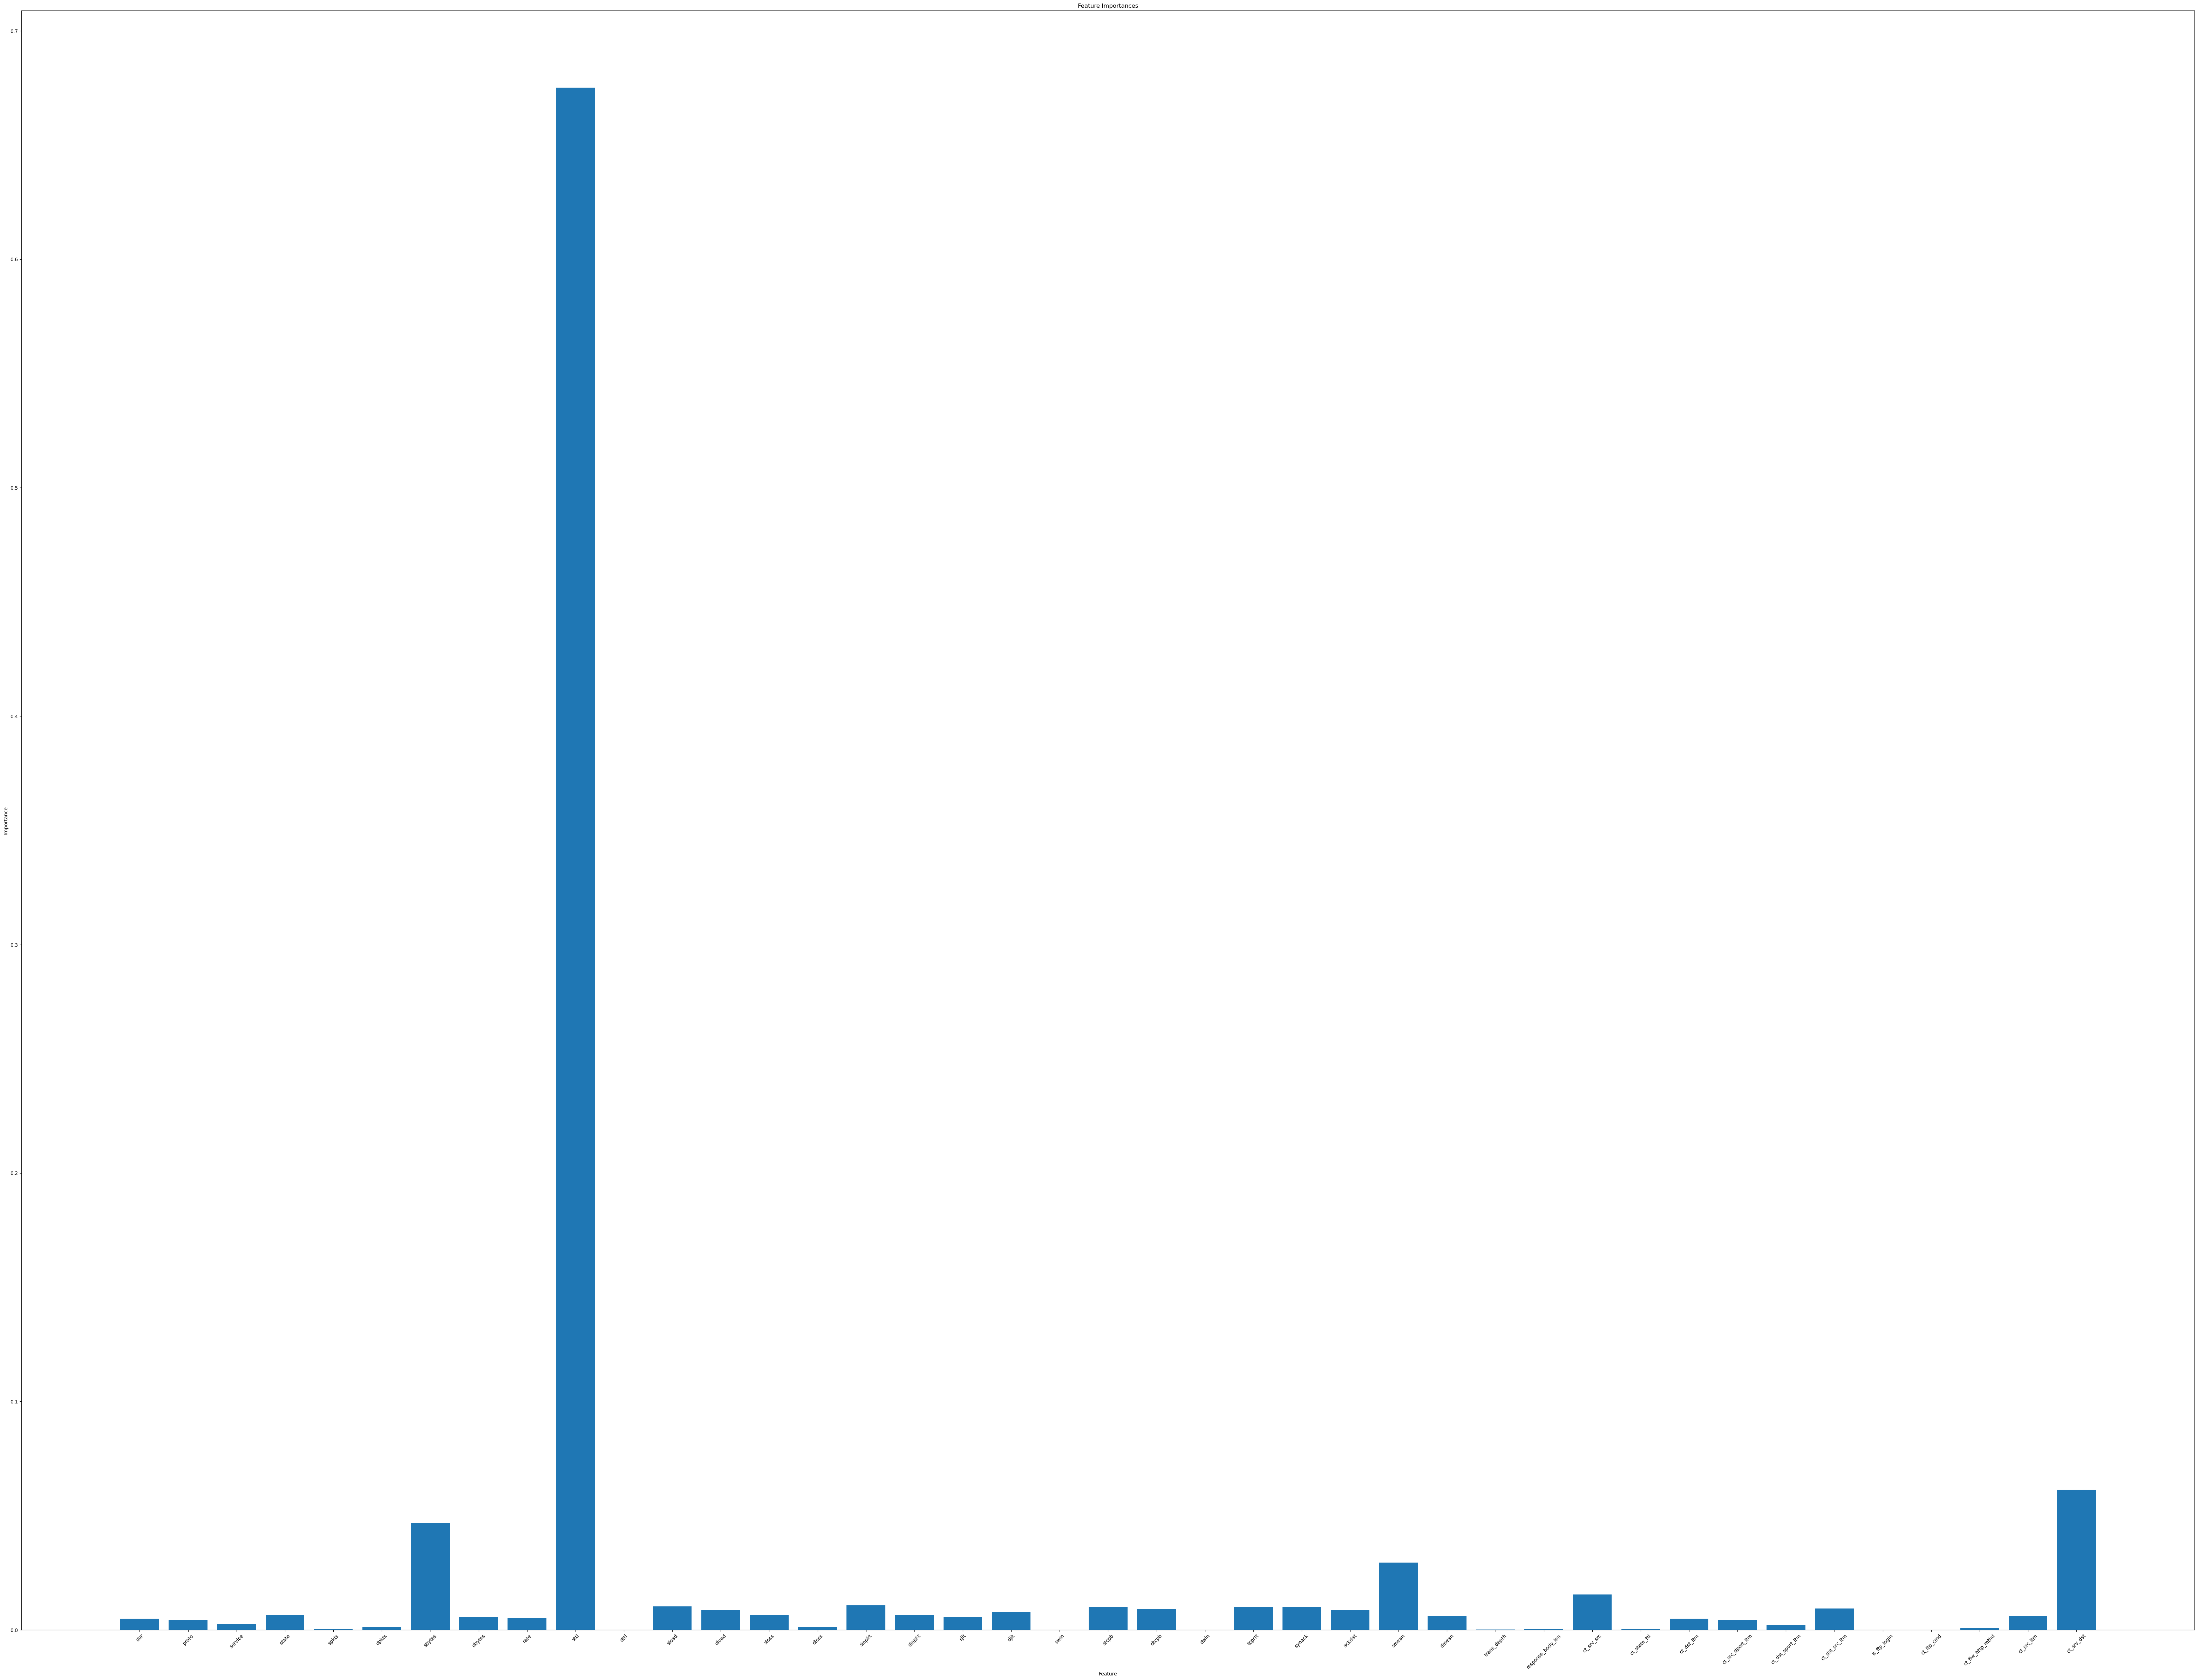

In [17]:
plt.figure(figsize=(80, 60))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=auxtrain.columns)
plt.title("Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

## Baseline model evaluation

In [20]:
train = pd.read_csv(r'D:\Project Phase II\Dataset\train.csv',encoding='cp1252')
test = pd.read_csv(r'D:\Project Phase II\Dataset\test.csv',encoding='cp1252')

In [21]:
todrop = ['srcip','sport','dstip','dsport','Stime','Ltime','attack_cat']
train1 = train.drop(todrop, axis = 1)
test1 = test.drop(todrop, axis = 1)

train1 = train1.drop_duplicates()
test1 = test1.drop_duplicates()

In [5]:
autrainfull = pd.read_csv(r'D:\Project Phase II\Dataset\tracetrain.csv',encoding='cp1252')
autestfull = pd.read_csv(r'D:\Project Phase II\Dataset\tracetest.csv',encoding='cp1252')

In [22]:
autest = pd.read_csv(r'D:\Project Phase II\Dataset\UNSW_NB15_testing-set.csv',encoding='cp1252')

In [23]:
autest = autest.drop(['ï»¿id','rate', 'attack_cat', 'is_sm_ips_ports'], axis = 1)

In [24]:
autest = autest.drop_duplicates()

In [7]:
# List of classifiers to include
import sklearn
import xgboost
import lightgbm
import sklearn.discriminant_analysis
from lazypredict.Supervised import LazyClassifier

#Skip SVM
classifiers = [
 ('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('KNeighborsClassifier',  sklearn.neighbors._classification.KNeighborsClassifier),
 ('LinearDiscriminantAnalysis',  sklearn.discriminant_analysis.LinearDiscriminantAnalysis),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('Perceptron', sklearn.linear_model._perceptron.Perceptron),
 ('QuadraticDiscriminantAnalysis',  sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis),
 ('RandomForestClassifier', sklearn.ensemble._forest.RandomForestClassifier),
 ('StackingClassifier', sklearn.ensemble._stacking.StackingClassifier),
 ('XGBClassifier', xgboost.sklearn.XGBClassifier),
 ('LGBMClassifier', lightgbm.sklearn.LGBMClassifier)]
clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None,classifiers=classifiers,predictions=True)


In [26]:
#Change column names of df
train1 = train1.rename(columns={'Dintpkt':'dinpkt','Djit':'djit','Dload':'dload','Dpkts':'dpkts','Label':'label','Sintpkt':'sinpkt','Sjit':'sjit','Sload': 'sload', 'Spkts':'spkts','dmeansz':'dmean','res_bdy_len':'response_body_len', 'smeansz':'smean', 'ct_src_ ltm':'ct_src_ltm'})

In [28]:
test1 = pd.concat([autrainfull,autestfull], ignore_index=True)

In [33]:
test1.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_srv_dst', 'label', 'sintpkt', 'dintpkt', 'ct_src_ ltm'],
      dtype='object')

In [34]:
train1.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'sjit', 'djit', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')

In [29]:
test1 = test1.drop(['srcip', 'sport', 'dstip', 'dsport', 'Stime', 'Ltime', 'attack_cat', 'ct_src_ltm', 'dinpkt', 'is_sm_ips_ports', 'sinpkt'], axis = 1)

In [18]:
autest.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'label'],
      dtype='object')

In [27]:
#rearrage the columns of test1 to match with train1
test1 = autest[train1.columns]

In [28]:
x_train = train1.drop(['label'], axis = 1)
y_train = train1['label']

x_test = test1.drop(['label'], axis = 1)
y_test = test1['label']

In [29]:
#label encode y_train
le = LabelEncoder()
x_test['proto'] = le.fit_transform(x_test['proto'])
x_test['state'] = le.fit_transform(x_test['state'])
x_test['service'] = le.fit_transform(x_test['service'])



In [30]:
#train models using clf 
models,predictions = clf.fit(x_train, x_test, y_train, y_test)


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  0%|          | 0/15 [00:00<?, ?it/s]

  7%|▋         | 1/15 [00:15<03:36, 15.49s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7283410565338276, 'Balanced Accuracy': 0.785638314404894, 'ROC AUC': 0.7856383144048941, 'F1 Score': 0.7281006637372655, 'Time taken': 15.494253158569336}


 13%|█▎        | 2/15 [00:31<03:22, 15.60s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.7395180722891567, 'Balanced Accuracy': 0.7941426739993189, 'ROC AUC': 0.7941426739993189, 'F1 Score': 0.7401246147326059, 'Time taken': 15.664320707321167}


 20%|██        | 3/15 [00:31<01:43,  8.65s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.6456348470806302, 'Balanced Accuracy': 0.6756503610944956, 'ROC AUC': 0.6756503610944956, 'F1 Score': 0.6505266403064877, 'Time taken': 0.3892037868499756}


 27%|██▋       | 4/15 [00:33<01:06,  6.05s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.7284708063021316, 'Balanced Accuracy': 0.7841886470513257, 'ROC AUC': 0.7841886470513257, 'F1 Score': 0.7286326439180617, 'Time taken': 2.0633962154388428}


 33%|███▎      | 5/15 [00:33<00:39,  3.97s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.6339944392956441, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.49198325207405696, 'Time taken': 0.2690424919128418}


 40%|████      | 6/15 [00:34<00:24,  2.74s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.674772937905468, 'Balanced Accuracy': 0.7419468330714352, 'ROC AUC': 0.7419468330714352, 'F1 Score': 0.6693678995032687, 'Time taken': 0.36489224433898926}


 47%|████▋     | 7/15 [00:53<01:05,  8.13s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7264133456904541, 'Balanced Accuracy': 0.7840859141479197, 'ROC AUC': 0.7840859141479196, 'F1 Score': 0.7260339123530779, 'Time taken': 19.234140396118164}


 53%|█████▎    | 8/15 [00:54<00:40,  5.76s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7014828544949027, 'Balanced Accuracy': 0.7631507651560268, 'ROC AUC': 0.7631507651560266, 'F1 Score': 0.6992379778456086, 'Time taken': 0.6614172458648682}


 60%|██████    | 9/15 [00:55<00:25,  4.28s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7196107506950881, 'Balanced Accuracy': 0.7697408828764296, 'ROC AUC': 0.7697408828764296, 'F1 Score': 0.7209519785962117, 'Time taken': 1.0400712490081787}


 67%|██████▋   | 10/15 [00:55<00:15,  3.14s/it]

{'Model': 'Perceptron', 'Accuracy': 0.7335125115848007, 'Balanced Accuracy': 0.7156170717545645, 'ROC AUC': 0.7156170717545645, 'F1 Score': 0.7342091436387025, 'Time taken': 0.5833067893981934}


 73%|███████▎  | 11/15 [00:56<00:09,  2.33s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.7157367933271548, 'Balanced Accuracy': 0.7751841928333598, 'ROC AUC': 0.7751841928333598, 'F1 Score': 0.71460701011322, 'Time taken': 0.49529385566711426}


 80%|████████  | 12/15 [01:17<00:24,  8.10s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7397219647822058, 'Balanced Accuracy': 0.7947102035163617, 'ROC AUC': 0.7947102035163617, 'F1 Score': 0.740249237707817, 'Time taken': 21.3080415725708}


 93%|█████████▎| 14/15 [01:19<00:04,  4.70s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.7227618164967563, 'Balanced Accuracy': 0.7813345749349092, 'ROC AUC': 0.7813345749349092, 'F1 Score': 0.7220567335013511, 'Time taken': 1.5737113952636719}
[LightGBM] [Info] Number of positive: 41231, number of negative: 41231
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018704 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5829
[LightGBM] [Info] Number of data points in the train set: 82462, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 15/15 [01:22<00:00,  5.48s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.7177386468952734, 'Balanced Accuracy': 0.7773944567886797, 'ROC AUC': 0.7773944567886797, 'F1 Score': 0.7166013061691429, 'Time taken': 3.009833812713623}


In [31]:
from sklearn.metrics import roc_auc_score
for model in predictions.columns:
    print(model)
    print(classification_report(y_test, predictions[model]))
    auc_scores = roc_auc_score(y_test, predictions[model], multi_class='ovr')  # Or multi_class='ovo' for one-vs-one
    print("AUC Scores for each class:", auc_scores)
    print('-----------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------')

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.57      0.73     34204
           1       0.57      1.00      0.73     19746

    accuracy                           0.73     53950
   macro avg       0.79      0.79      0.73     53950
weighted avg       0.84      0.73      0.73     53950

AUC Scores for each class: 0.7856383144048941
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.59      0.74     34204
           1       0.58      1.00      0.74     19746

    accuracy                           0.74     53950
   macro avg       0.79      0.79      0.74     53950
weighted avg       0.85      0.74      0.74     53950

AUC Scores for each class: 0.7941426739993189
-------------------------------------------------

In [16]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report
from sklearn.base import clone
from sklearn.metrics import roc_auc_score

X = df.drop(['Label'], axis = 1)
y = df['Label']
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
if isinstance(X, pd.DataFrame):
    X = X.values
    y = y.values
# Fit LazyClassifier and obtain predictions for each fold
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Clone the classifier to ensure a fresh instance for each fold
    clf = LazyClassifier(verbose=1,ignore_warnings=True, custom_metric=None,classifiers=classifiers,predictions=True)
    models,y_pred = clf.fit(X_train, X_test, y_train, y_test)
    print("\n\nClassification Report (Fold {}):\n".format(test_index[0]))
    for model in y_pred.columns:
        print(model)
        print(classification_report(y_test, y_pred[model]))
        auc_scores = roc_auc_score(y_test, y_pred[model], multi_class='ovr')  # Or multi_class='ovo' for one-vs-one
        print("AUC Scores for each class:", auc_scores)
        print('-----------------------------------------------------------------------------------')


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


  7%|▋         | 1/15 [00:37<08:46, 37.63s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9917660540724078, 'Balanced Accuracy': 0.9918240882027077, 'ROC AUC': 0.9918240882027077, 'F1 Score': 0.9917660974432811, 'Time taken': 37.62700581550598}


 13%|█▎        | 2/15 [01:12<07:50, 36.18s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9913416238699546, 'Balanced Accuracy': 0.991389416035382, 'ROC AUC': 0.9913894160353821, 'F1 Score': 0.9913417279666493, 'Time taken': 35.16499471664429}


 20%|██        | 3/15 [01:13<03:59, 19.96s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9766563388650736, 'Balanced Accuracy': 0.9766003585036526, 'ROC AUC': 0.9766003585036528, 'F1 Score': 0.9766539901937684, 'Time taken': 0.6599974632263184}


 27%|██▋       | 4/15 [01:17<02:32, 13.86s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.985824031238063, 'Balanced Accuracy': 0.9858169901906915, 'ROC AUC': 0.9858169901906916, 'F1 Score': 0.9858239360808565, 'Time taken': 4.515000104904175}


 33%|███▎      | 5/15 [01:18<01:30,  9.05s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.4959891345868172, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3288863748280163, 'Time taken': 0.5200035572052002}


 40%|████      | 6/15 [01:19<00:55,  6.22s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.976698781885319, 'Balanced Accuracy': 0.976830413360116, 'ROC AUC': 0.976830413360116, 'F1 Score': 0.9766954663684847, 'Time taken': 0.7210114002227783}


 47%|████▋     | 7/15 [01:46<01:44, 13.00s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9917236110521624, 'Balanced Accuracy': 0.9917813019627625, 'ROC AUC': 0.9917813019627626, 'F1 Score': 0.9917236569426132, 'Time taken': 26.956446886062622}


 53%|█████▎    | 8/15 [01:47<01:05,  9.39s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9869699927846866, 'Balanced Accuracy': 0.9870226109514759, 'ROC AUC': 0.9870226109514758, 'F1 Score': 0.9869701107101656, 'Time taken': 1.6539990901947021}


 60%|██████    | 9/15 [01:50<00:43,  7.26s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9917660540724078, 'Balanced Accuracy': 0.9918240882027077, 'ROC AUC': 0.9918240882027077, 'F1 Score': 0.9917660974432811, 'Time taken': 2.5870039463043213}


 67%|██████▋   | 10/15 [01:51<00:26,  5.30s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9892619158779339, 'Balanced Accuracy': 0.989309914697749, 'ROC AUC': 0.989309914697749, 'F1 Score': 0.9892620431212233, 'Time taken': 0.913992166519165}


 73%|███████▎  | 11/15 [01:52<00:16,  4.16s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9898561181613683, 'Balanced Accuracy': 0.9899136888944936, 'ROC AUC': 0.9899136888944936, 'F1 Score': 0.9898561744065874, 'Time taken': 1.5720150470733643}


 80%|████████  | 12/15 [02:41<00:53, 17.83s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9923602563558422, 'Balanced Accuracy': 0.9924190097012169, 'ROC AUC': 0.9924190097012169, 'F1 Score': 0.9923602922754869, 'Time taken': 49.078004121780396}


 93%|█████████▎| 14/15 [02:47<00:10, 10.82s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.992190484274861, 'Balanced Accuracy': 0.9922471837646487, 'ROC AUC': 0.9922471837646487, 'F1 Score': 0.9921905339072965, 'Time taken': 5.527029752731323}
[LightGBM] [Info] Number of positive: 47216, number of negative: 47027
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6349
[LightGBM] [Info] Number of data points in the train set: 94243, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501003 -> initscore=0.004011
[LightGBM] [Info] Start training from score 0.004011


100%|██████████| 15/15 [02:53<00:00, 11.54s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9924026993760876, 'Balanced Accuracy': 0.9924611149643748, 'ROC AUC': 0.9924611149643748, 'F1 Score': 0.9924027372585463, 'Time taken': 5.552004814147949}


Classification Report (Fold 0):

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11875
           1       0.98      1.00      0.99     11686

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
weighted avg       0.99      0.99      0.99     23561

AUC Scores for each class: 0.9918240882027077
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11875
           1       0.99      1.00      0.99     11686

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
we

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11875
           1       0.98      0.97      0.98     11686

    accuracy                           0.98     23561
   macro avg       0.98      0.98      0.98     23561
weighted avg       0.98      0.98      0.98     23561

AUC Scores for each class: 0.9766003585036528
-----------------------------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11875
           1       0.99      0.98      0.99     11686

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
weighted avg       0.99      0.99      0.99     23561

AUC Scores for each class: 0.9858169901906916
-----------------------------------------------------------------------------------
DummyClassifier
              precision    recall  f1-score   s

  7%|▋         | 1/15 [00:37<08:48, 37.75s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9918084970926531, 'Balanced Accuracy': 0.9916977417174819, 'ROC AUC': 0.9916977417174819, 'F1 Score': 0.9918071084288963, 'Time taken': 37.74900412559509}


 13%|█▎        | 2/15 [01:14<08:01, 37.05s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9915538389711812, 'Balanced Accuracy': 0.9914656959330331, 'ROC AUC': 0.991465695933033, 'F1 Score': 0.9915527884031775, 'Time taken': 36.55193471908569}


 20%|██        | 3/15 [01:15<04:06, 20.51s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9745341878528077, 'Balanced Accuracy': 0.9746257750925225, 'ROC AUC': 0.9746257750925225, 'F1 Score': 0.9745354438658722, 'Time taken': 0.8233456611633301}


 27%|██▋       | 4/15 [01:20<02:39, 14.50s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.98412631042825, 'Balanced Accuracy': 0.9841565744371699, 'ROC AUC': 0.9841565744371699, 'F1 Score': 0.984126750851598, 'Time taken': 5.2902140617370605}


 33%|███▎      | 5/15 [01:20<01:34,  9.45s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.4929756801493994, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3255579102191991, 'Time taken': 0.5070044994354248}


 40%|████      | 6/15 [01:21<00:58,  6.49s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.978566274776113, 'Balanced Accuracy': 0.9783539055322779, 'ROC AUC': 0.978353905532278, 'F1 Score': 0.978557103992087, 'Time taken': 0.722038745880127}


 47%|████▋     | 7/15 [01:56<02:05, 15.71s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9917236110521624, 'Balanced Accuracy': 0.9916152244578289, 'ROC AUC': 0.9916152244578289, 'F1 Score': 0.9917222493560564, 'Time taken': 34.68899631500244}


 53%|█████▎    | 8/15 [01:58<01:18, 11.26s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9872670939264038, 'Balanced Accuracy': 0.9871727372112662, 'ROC AUC': 0.9871727372112661, 'F1 Score': 0.9872653800218929, 'Time taken': 1.7410056591033936}


 60%|██████    | 9/15 [02:01<00:53,  8.87s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.991935826153389, 'Balanced Accuracy': 0.9918268850665994, 'ROC AUC': 0.9918268850665993, 'F1 Score': 0.9919344893418598, 'Time taken': 3.60099720954895}


 67%|██████▋   | 10/15 [02:02<00:32,  6.48s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9794575782012648, 'Balanced Accuracy': 0.9795382096460907, 'ROC AUC': 0.9795382096460907, 'F1 Score': 0.9794585714140452, 'Time taken': 1.132993459701538}


 73%|███████▎  | 11/15 [02:04<00:20,  5.02s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9888374856754807, 'Balanced Accuracy': 0.9887273365818445, 'ROC AUC': 0.9887273365818445, 'F1 Score': 0.9888356213219853, 'Time taken': 1.6980020999908447}


 80%|████████  | 12/15 [02:57<00:58, 19.48s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9925300284368236, 'Balanced Accuracy': 0.9924235901851055, 'ROC AUC': 0.9924235901851054, 'F1 Score': 0.9925288271318253, 'Time taken': 52.56177282333374}


 93%|█████████▎| 14/15 [03:03<00:11, 11.87s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9921055982343704, 'Balanced Accuracy': 0.9920098111180323, 'ROC AUC': 0.9920098111180323, 'F1 Score': 0.9921044990137993, 'Time taken': 6.217001676559448}
[LightGBM] [Info] Number of positive: 46956, number of negative: 47287
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.047193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6355
[LightGBM] [Info] Number of data points in the train set: 94243, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498244 -> initscore=-0.007024
[LightGBM] [Info] Start training from score -0.007024


100%|██████████| 15/15 [03:09<00:00, 12.60s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9923602563558422, 'Balanced Accuracy': 0.9922549773593742, 'ROC AUC': 0.9922549773593742, 'F1 Score': 0.9923590465058211, 'Time taken': 5.735008478164673}


Classification Report (Fold 1):

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11615
           1       0.98      1.00      0.99     11946

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
weighted avg       0.99      0.99      0.99     23561

AUC Scores for each class: 0.9916977417174819
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11615
           1       0.99      1.00      0.99     11946

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
we

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11615
           1       0.99      0.98      0.98     11946

    accuracy                           0.98     23561
   macro avg       0.98      0.98      0.98     23561
weighted avg       0.98      0.98      0.98     23561

AUC Scores for each class: 0.9841565744371699
-----------------------------------------------------------------------------------
DummyClassifier
              precision    recall  f1-score   support

           0       0.49      1.00      0.66     11615
           1       0.00      0.00      0.00     11946

    accuracy                           0.49     23561
   macro avg       0.25      0.50      0.33     23561
weighted avg       0.24      0.49      0.33     23561

AUC Scores for each class: 0.5
-----------------------------------------------------------------------------------
GaussianNB
              precision    recall  f1-score   support

           0       

  7%|▋         | 1/15 [00:37<08:46, 37.57s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9917236110521624, 'Balanced Accuracy': 0.9916981387157848, 'ROC AUC': 0.9916981387157847, 'F1 Score': 0.9917229015874803, 'Time taken': 37.57199764251709}


 13%|█▎        | 2/15 [01:14<08:00, 36.93s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9915113959509358, 'Balanced Accuracy': 0.9914885568388889, 'ROC AUC': 0.9914885568388889, 'F1 Score': 0.9915107915081895, 'Time taken': 36.48500084877014}


 20%|██        | 3/15 [01:14<04:04, 20.37s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9744068587920717, 'Balanced Accuracy': 0.9744308596986548, 'ROC AUC': 0.974430859698655, 'F1 Score': 0.9744060680992568, 'Time taken': 0.6609997749328613}


 27%|██▋       | 4/15 [01:19<02:37, 14.34s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.985187385934383, 'Balanced Accuracy': 0.9851915277372036, 'ROC AUC': 0.9851915277372036, 'F1 Score': 0.9851874239853284, 'Time taken': 5.083998203277588}


 33%|███▎      | 5/15 [01:20<01:33,  9.35s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.49836594372055515, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3315192992757986, 'Time taken': 0.49801135063171387}


 40%|████      | 6/15 [01:21<00:57,  6.41s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.978014515512924, 'Balanced Accuracy': 0.9779629579750055, 'ROC AUC': 0.9779629579750055, 'F1 Score': 0.9780079629047942, 'Time taken': 0.7119970321655273}


 47%|████▋     | 7/15 [01:44<01:36, 12.11s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9914265099104452, 'Balanced Accuracy': 0.9914014505309741, 'ROC AUC': 0.9914014505309741, 'F1 Score': 0.9914257953688487, 'Time taken': 23.843000888824463}


 53%|█████▎    | 8/15 [01:46<01:00,  8.71s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9873519799668945, 'Balanced Accuracy': 0.9873299286897763, 'ROC AUC': 0.9873299286897763, 'F1 Score': 0.9873511339028044, 'Time taken': 1.4310026168823242}


 60%|██████    | 9/15 [01:48<00:40,  6.82s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9916387250116718, 'Balanced Accuracy': 0.991614084028948, 'ROC AUC': 0.9916140840289481, 'F1 Score': 0.991638047771786, 'Time taken': 2.646001100540161}


 67%|██████▋   | 10/15 [01:49<00:25,  5.03s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9870124358049319, 'Balanced Accuracy': 0.9869970389836054, 'ROC AUC': 0.9869970389836055, 'F1 Score': 0.9870119545203834, 'Time taken': 1.0360028743743896}


 73%|███████▎  | 11/15 [01:51<00:16,  4.04s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9893468019184245, 'Balanced Accuracy': 0.9893215816162219, 'ROC AUC': 0.9893215816162219, 'F1 Score': 0.9893459056400383, 'Time taken': 1.7920024394989014}


 80%|████████  | 12/15 [02:42<00:55, 18.34s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.992190484274861, 'Balanced Accuracy': 0.9921651556350528, 'ROC AUC': 0.9921651556350528, 'F1 Score': 0.9921898210507584, 'Time taken': 51.030001163482666}


 93%|█████████▎| 14/15 [02:48<00:11, 11.13s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9920207121938797, 'Balanced Accuracy': 0.9919964914211834, 'ROC AUC': 0.9919964914211834, 'F1 Score': 0.9920200843539216, 'Time taken': 5.690031051635742}
[LightGBM] [Info] Number of positive: 47083, number of negative: 47160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6352
[LightGBM] [Info] Number of data points in the train set: 94243, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499591 -> initscore=-0.001634
[LightGBM] [Info] Start training from score -0.001634


100%|██████████| 15/15 [02:54<00:00, 11.62s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9920207121938797, 'Balanced Accuracy': 0.9919962140010854, 'ROC AUC': 0.9919962140010854, 'F1 Score': 0.9920200720759969, 'Time taken': 5.79400372505188}


Classification Report (Fold 4):

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11742
           1       0.98      1.00      0.99     11819

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
weighted avg       0.99      0.99      0.99     23561

AUC Scores for each class: 0.9916981387157847
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11742
           1       0.98      1.00      0.99     11819

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
wei

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11742
           1       0.98      0.97      0.97     11819

    accuracy                           0.97     23561
   macro avg       0.97      0.97      0.97     23561
weighted avg       0.97      0.97      0.97     23561

AUC Scores for each class: 0.974430859698655
-----------------------------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11742
           1       0.99      0.98      0.99     11819

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
weighted avg       0.99      0.99      0.99     23561

AUC Scores for each class: 0.9851915277372036
-----------------------------------------------------------------------------------
DummyClassifier
              precision    recall  f1-score   su

  7%|▋         | 1/15 [00:40<09:24, 40.34s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9910445227282373, 'Balanced Accuracy': 0.9910226783805165, 'ROC AUC': 0.9910226783805166, 'F1 Score': 0.9910436495284626, 'Time taken': 40.335002183914185}


 13%|█▎        | 2/15 [01:17<08:19, 38.45s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9909596366877467, 'Balanced Accuracy': 0.9909394923493999, 'ROC AUC': 0.9909394923493999, 'F1 Score': 0.990958873273869, 'Time taken': 37.132009506225586}


 20%|██        | 3/15 [01:18<04:14, 21.19s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9743644157718263, 'Balanced Accuracy': 0.9743774342155181, 'ROC AUC': 0.9743774342155183, 'F1 Score': 0.9743640435566059, 'Time taken': 0.6540074348449707}


 27%|██▋       | 4/15 [01:22<02:41, 14.72s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.98412631042825, 'Balanced Accuracy': 0.9841279114300252, 'ROC AUC': 0.9841279114300252, 'F1 Score': 0.9841263301016913, 'Time taken': 4.799006462097168}


 33%|███▎      | 5/15 [01:23<01:36,  9.61s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.49874793090276304, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3319430752173974, 'Time taken': 0.5400023460388184}


 40%|████      | 6/15 [01:24<00:59,  6.58s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.9765290098043377, 'Balanced Accuracy': 0.9764877307719717, 'ROC AUC': 0.9764877307719718, 'F1 Score': 0.9765217094246927, 'Time taken': 0.7079999446868896}


 47%|████▋     | 7/15 [01:49<01:42, 12.81s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9902805483638216, 'Balanced Accuracy': 0.9902591243608287, 'ROC AUC': 0.9902591243608286, 'F1 Score': 0.9902796332468294, 'Time taken': 25.586998462677002}


 53%|█████▎    | 8/15 [01:51<01:05,  9.30s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9862484614405161, 'Balanced Accuracy': 0.9862309446559433, 'ROC AUC': 0.9862309446559433, 'F1 Score': 0.9862475553919646, 'Time taken': 1.7869980335235596}


 60%|██████    | 9/15 [01:54<00:43,  7.28s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.9908323076270107, 'Balanced Accuracy': 0.9908103556646881, 'ROC AUC': 0.990810355664688, 'F1 Score': 0.9908314059715213, 'Time taken': 2.847001791000366}


 67%|██████▋   | 10/15 [01:55<00:26,  5.37s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9829803488816264, 'Balanced Accuracy': 0.9829729085697285, 'ROC AUC': 0.9829729085697285, 'F1 Score': 0.9829800780900857, 'Time taken': 1.0840110778808594}


 73%|███████▎  | 11/15 [01:57<00:17,  4.37s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9886252705742541, 'Balanced Accuracy': 0.9886039424752868, 'ROC AUC': 0.9886039424752868, 'F1 Score': 0.9886242090354372, 'Time taken': 1.6340010166168213}


 80%|████████  | 12/15 [02:51<00:57, 19.31s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9912142948092186, 'Balanced Accuracy': 0.9911924515260957, 'ROC AUC': 0.9911924515260956, 'F1 Score': 0.9912134381629941, 'Time taken': 53.46000337600708}


 93%|█████████▎| 14/15 [02:56<00:11, 11.67s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9909596366877467, 'Balanced Accuracy': 0.9909388546462725, 'ROC AUC': 0.9909388546462725, 'F1 Score': 0.9909588299781004, 'Time taken': 5.764997243881226}
[LightGBM] [Info] Number of positive: 47092, number of negative: 47151
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6359
[LightGBM] [Info] Number of data points in the train set: 94243, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499687 -> initscore=-0.001252
[LightGBM] [Info] Start training from score -0.001252


100%|██████████| 15/15 [03:02<00:00, 12.18s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9912142948092186, 'Balanced Accuracy': 0.9911924515260957, 'ROC AUC': 0.9911924515260956, 'F1 Score': 0.9912134381629941, 'Time taken': 5.771999835968018}


Classification Report (Fold 9):

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11751
           1       0.98      1.00      0.99     11810

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
weighted avg       0.99      0.99      0.99     23561

AUC Scores for each class: 0.9910226783805166
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11751
           1       0.98      1.00      0.99     11810

    accuracy                           0.99     23561
   macro avg       0.99      0.99      0.99     23561
we

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11751
           1       0.98      0.98      0.98     11810

    accuracy                           0.98     23561
   macro avg       0.98      0.98      0.98     23561
weighted avg       0.98      0.98      0.98     23561

AUC Scores for each class: 0.9841279114300252
-----------------------------------------------------------------------------------
DummyClassifier
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     11751
           1       0.00      0.00      0.00     11810

    accuracy                           0.50     23561
   macro avg       0.25      0.50      0.33     23561
weighted avg       0.25      0.50      0.33     23561

AUC Scores for each class: 0.5
-----------------------------------------------------------------------------------
GaussianNB
              precision    recall  f1-score   support

           0       

  7%|▋         | 1/15 [00:37<08:38, 37.05s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.9918081494057724, 'Balanced Accuracy': 0.9918986741526408, 'ROC AUC': 0.9918986741526408, 'F1 Score': 0.9918084059801046, 'Time taken': 37.04400134086609}


 13%|█▎        | 2/15 [01:13<07:55, 36.57s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.9915959252971137, 'Balanced Accuracy': 0.9916688888435793, 'ROC AUC': 0.9916688888435792, 'F1 Score': 0.9915962166086089, 'Time taken': 36.22906851768494}


 20%|██        | 3/15 [01:13<04:02, 20.17s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.9768675721561969, 'Balanced Accuracy': 0.9768207722661713, 'ROC AUC': 0.9768207722661714, 'F1 Score': 0.9768662484639965, 'Time taken': 0.6489911079406738}


 27%|██▋       | 4/15 [01:18<02:36, 14.20s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.9848471986417657, 'Balanced Accuracy': 0.9848245515200862, 'ROC AUC': 0.9848245515200861, 'F1 Score': 0.9848468415362785, 'Time taken': 5.04899787902832}


 33%|███▎      | 5/15 [01:19<01:32,  9.25s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.49410016977928695, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.3267986748331399, 'Time taken': 0.4740023612976074}


 40%|████      | 6/15 [01:20<00:57,  6.34s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.9769949066213922, 'Balanced Accuracy': 0.9771770376940665, 'ROC AUC': 0.9771770376940665, 'F1 Score': 0.9769934958079077, 'Time taken': 0.7000021934509277}


 47%|████▋     | 7/15 [01:44<01:36, 12.11s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.9919354838709677, 'Balanced Accuracy': 0.9920195145943995, 'ROC AUC': 0.9920195145943995, 'F1 Score': 0.9919357506241109, 'Time taken': 23.972004413604736}


 53%|█████▎    | 8/15 [01:45<01:01,  8.72s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.9873089983022071, 'Balanced Accuracy': 0.9873888784515824, 'ROC AUC': 0.9873888784515825, 'F1 Score': 0.9873094268913076, 'Time taken': 1.450993537902832}


 60%|██████    | 9/15 [01:47<00:40,  6.74s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.991893039049236, 'Balanced Accuracy': 0.9919795683832972, 'ROC AUC': 0.9919795683832972, 'F1 Score': 0.9918933023129979, 'Time taken': 2.408001184463501}


 67%|██████▋   | 10/15 [01:49<00:25,  5.09s/it]

{'Model': 'Perceptron', 'Accuracy': 0.9845500848896435, 'Balanced Accuracy': 0.9845679696367571, 'ROC AUC': 0.984567969636757, 'F1 Score': 0.9845503498963073, 'Time taken': 1.398998498916626}


 73%|███████▎  | 11/15 [01:51<00:16,  4.08s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.9891341256366724, 'Balanced Accuracy': 0.989239806053055, 'ROC AUC': 0.989239806053055, 'F1 Score': 0.9891343937454663, 'Time taken': 1.7619986534118652}


 80%|████████  | 12/15 [02:40<00:53, 17.91s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.9925721561969439, 'Balanced Accuracy': 0.9926567764820984, 'ROC AUC': 0.9926567764820984, 'F1 Score': 0.9925724010474671, 'Time taken': 49.552006244659424}


 93%|█████████▎| 14/15 [02:46<00:10, 10.90s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.9924872665534805, 'Balanced Accuracy': 0.9925678677838287, 'ROC AUC': 0.9925678677838287, 'F1 Score': 0.9924875202667607, 'Time taken': 5.675005197525024}
[LightGBM] [Info] Number of positive: 47261, number of negative: 46983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6357
[LightGBM] [Info] Number of data points in the train set: 94244, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501475 -> initscore=0.005900
[LightGBM] [Info] Start training from score 0.005900


100%|██████████| 15/15 [02:52<00:00, 11.48s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.9926146010186757, 'Balanced Accuracy': 0.992698726310104, 'ROC AUC': 0.992698726310104, 'F1 Score': 0.9926148453083964, 'Time taken': 5.750999689102173}


Classification Report (Fold 2):

AdaBoostClassifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11919
           1       0.98      1.00      0.99     11641

    accuracy                           0.99     23560
   macro avg       0.99      0.99      0.99     23560
weighted avg       0.99      0.99      0.99     23560

AUC Scores for each class: 0.9918986741526408
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     11919
           1       0.99      1.00      0.99     11641

    accuracy                           0.99     23560
   macro avg       0.99      0.99      0.99     23560
weig

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11919
           1       0.98      0.97      0.98     11641

    accuracy                           0.98     23560
   macro avg       0.98      0.98      0.98     23560
weighted avg       0.98      0.98      0.98     23560

AUC Scores for each class: 0.9768207722661714
-----------------------------------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11919
           1       0.99      0.98      0.98     11641

    accuracy                           0.98     23560
   macro avg       0.98      0.98      0.98     23560
weighted avg       0.98      0.98      0.98     23560

AUC Scores for each class: 0.9848245515200861
-----------------------------------------------------------------------------------
DummyClassifier
              precision    recall  f1-score   s

In [72]:
from sklearn.metrics import roc_auc_score
for model in predictions.columns:
    print(model)
    print(classification_report(y_test, predictions[model]))
    auc_scores = roc_auc_score(y_test, predictions[model], multi_class='ovr')  # Or multi_class='ovo' for one-vs-one
    print("AUC Scores for each class:", auc_scores)
    print('-----------------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------------')

AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     34206
           1       0.59      0.99      0.74     19746

    accuracy                           0.74     53952
   macro avg       0.79      0.79      0.74     53952
weighted avg       0.84      0.74      0.74     53952

AUC Scores for each class: 0.7928207574913912
-----------------------------------------------------------------------------------
-----------------------------------------------------------------------------------
BaggingClassifier
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     34206
           1       0.70      0.94      0.80     19746

    accuracy                           0.83     53952
   macro avg       0.83      0.85      0.83     53952
weighted avg       0.86      0.83      0.83     53952

AUC Scores for each class: 0.853926883346229
--------------------------------------------------

## Remove the other unwanted columns

In [7]:
df = pd.read_csv(r'D:\Project Phase II\Dataset\phase2labelencodeddataset.csv',encoding='cp1252')

C:\Users\sathi\AppData\Local\Temp\ipykernel_2220\3370251438.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'D:\Project Phase II\Dataset\phase2labelencodeddataset.csv',encoding='cp1252')


In [23]:
df = df.drop_duplicates()

In [24]:
len(df)

2055683

In [25]:
df.groupby(['proto','Label']).sum()

In [19]:
train = pd.read_csv(r'D:\Project Phase II\Dataset\train.csv',encoding='cp1252')
test = pd.read_csv(r'D:\Project Phase II\Dataset\test.csv',encoding='cp1252')

In [20]:
todrop = ['srcip','sport','dstip','dsport','Stime','Ltime','attack_cat', 'sttl','ct_state_ttl']
train = train.drop(todrop, axis = 1)
test = test.drop(todrop, axis = 1)
train = train.drop_duplicates()
test = test.drop_duplicates()

In [21]:
X_train = train.drop(['Label'], axis = 1)
y_train = train['Label']

X_test = test.drop(['Label'], axis = 1)
y_test = test['Label']

Decision Tree and its importance ranking

In [13]:
# Create a decision tree and train it
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Find the feature importances
feature_importances = decision_tree.feature_importances_

# Sort the feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Print the sorted feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance}")


sttl: 0.9598604612638756
tcprtt: 0.0031931285229357524
dtcpb: 0.002790979508138019
dbytes: 0.0024976342767277014
stcpb: 0.002469027638081055
ackdat: 0.0023586617917545137
synack: 0.0021848241636572853
Dload: 0.0020980450483703964
sbytes: 0.0017444701521762947
state: 0.0015974867502420275
ct_state_ttl: 0.0015358622648859194
dur: 0.0014867911067034823
smeansz: 0.0014736123026637456
Sjit: 0.0014541970349871798
ct_srv_dst: 0.0014461178733577165
Sload: 0.001426029576383216
Sintpkt: 0.0012132460663494627
Dintpkt: 0.0011739826603547508
dmeansz: 0.0011660000041556146
Djit: 0.001098150377384562
ct_dst_ltm: 0.000980023267925962
sloss: 0.0007251649217869243
ct_src_ ltm: 0.0007249273363138354
ct_srv_src: 0.000697584490822078
ct_dst_src_ltm: 0.0006024329323684993
res_bdy_len: 0.0003338742431895048
ct_src_dport_ltm: 0.00026327598693451376
dttl: 0.00019002173133700763
ct_flw_http_mthd: 0.00016677815311384012
Spkts: 0.00016354449859634423
trans_depth: 0.00016284557042724442
proto: 0.000144566925355816

without sttl

In [18]:
# Create a decision tree and train it
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Find the feature importances
feature_importances = decision_tree.feature_importances_

# Sort the feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Print the sorted feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance}")

ct_state_ttl: 0.9503102167546406
dttl: 0.011980985250935933
synack: 0.003979830257613693
stcpb: 0.0028777291544520825
dtcpb: 0.002691449838659846
smeansz: 0.002670493262802607
ackdat: 0.002557251639341623
sbytes: 0.0022926714142647428
Dload: 0.00193788333362926
tcprtt: 0.001706903388045523
ct_srv_dst: 0.001630407740809051
ct_srv_src: 0.001603199642607703
Sload: 0.0015179931927314552
Sintpkt: 0.0014986145860480756
Sjit: 0.001496723000078696
Dintpkt: 0.0014115810996651577
Djit: 0.0012360036190233372
dbytes: 0.0010895066596709245
dur: 0.0010889739657493108
sloss: 0.0008217590455344789
ct_dst_src_ltm: 0.0007726071684038266
ct_src_ ltm: 0.0006818423616774256
dmeansz: 0.0004991564921608542
ct_dst_ltm: 0.0004963196759115563
proto: 0.00021047708387236504
res_bdy_len: 0.0001803402585512381
dloss: 0.00013743870841973835
ct_src_dport_ltm: 0.00010812310466202247
Dpkts: 0.00010779506542724577
ct_flw_http_mthd: 0.00010390423565263385
Spkts: 8.013963020035228e-05
ct_dst_sport_ltm: 7.871925776184085e-

without sttl and ct_state_ttl

In [22]:
# Create a decision tree and train it
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Find the feature importances
feature_importances = decision_tree.feature_importances_

# Sort the feature importances
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Print the sorted feature importances
for feature, importance in zip(sorted_features, sorted_importances):
    print(f"{feature}: {importance}")

dttl: 0.8182407495547448
state: 0.14045964399968824
dbytes: 0.005681925719142626
Sload: 0.00343669395297432
dtcpb: 0.00299722405044316
stcpb: 0.0025799445874176473
ackdat: 0.002480835105842955
Dload: 0.0022176149279923155
tcprtt: 0.002041717324567916
synack: 0.001939485070130847
sbytes: 0.0018967760845193542
smeansz: 0.0016048023971321893
Djit: 0.0015577355245825538
Dintpkt: 0.001372455633837228
Sjit: 0.0012996084920014618
ct_srv_dst: 0.001232528476999792
dur: 0.0012115134174477322
Sintpkt: 0.0010642144259671647
dmeansz: 0.0009397144137260795
ct_dst_src_ltm: 0.0009349965123613722
ct_src_ ltm: 0.0008926245179554431
ct_dst_ltm: 0.0006920955768016387
ct_srv_src: 0.0006824715347848011
sloss: 0.0005641931992955725
dloss: 0.0005100059881082952
ct_src_dport_ltm: 0.00035878168137363624
res_bdy_len: 0.00033217169890788044
Spkts: 0.0002848382187283915
ct_dst_sport_ltm: 0.00020638975118542625
proto: 9.261391123402212e-05
service: 7.37098391077247e-05
is_ftp_login: 5.91759367541379e-05
Dpkts: 3.90